In [1]:
import numpy as np
import ionize_analysis as ia
import vsim_plots as vp
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.stats import norm
import matplotlib.mlab as mlab
from scipy.optimize import curve_fit as cf
import sys
sys.path.insert(0,"../../python/")
sys.path.insert(0, "../")
from Constants import SI
import vsim.load as load
import vsim.analyze as analyze
from importlib import reload as rel
from scipy.signal import gaussian
plt.style.use('Presentation')
global kb, me
kb = SI.boltzmann
me = SI.elecMass

In [2]:
simPath = "/media/keenan/Data_Storage/VSim/nersc/"
simName = "laserIonize_ionizedElectrons_6.h5"
savePath = '/media/keenan/Data_Storage/Google Drive/CU/PWFA/Group Meetings/2018/2018-09/9_10/'
data = load.get_species_data(simPath + simName, 'ionizedElectrons')
spacing = 10e-6

In [3]:
y = data[:,1]
ux = data[:,2]
uy = data[:,3]
weights = data[:,-1]
u2 = ux**2 + uy**2
gamma = 1/np.sqrt(1- u2 / ((3e8)**2+u2))
ux = ux/gamma
uy = uy/gamma
edges = np.arange(min(y), max(y), spacing)



In [46]:
ia = rel(ia)

In [54]:
def get_fit(i, p0, edges,y, uy, weights):
    l = edges[i]
    u = edges[i+1]
    w = np.where(np.logical_and(y>=l, y<=u))
    vy = uy[w]
    wt = weights[w]
    #(mu, sigma) = norm.fit(vy)
    n, bins, patches = plt.hist(vy, bins = 200, weights = wt)
    popt, pcov = cf(ia.offset_peak, bins[1:], n, p0 = p0, \
                    bounds = ([0, -np.inf, -np.inf], [np.inf, np.inf, np.inf]))
    sigma = popt[1];
    T = (me * sigma**2/kb)/11600
    f  = ia.offset_peak(bins[1:], *popt)
    plt.plot(bins[1:], f, '--r')
    print(T)
    plt.show()

441.09007167


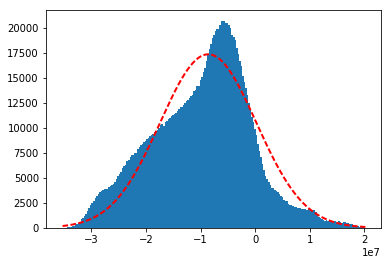

In [55]:
p0 = [1e5, 1e7, 1e7]
get_fit(0, p0, edges, y, uy, weights)

In [57]:
T, edges = ia.get_T_dist(data, 10e-6)

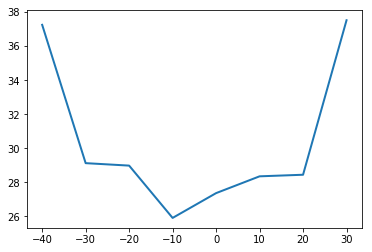

In [64]:
plt.plot(edges[1:-1]*1e6, T[1:-1])
plt.show()